In [1]:
from __future__ import division
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import pyfits as fits
from scipy.stats import norm

import pandas as pd

# Red shift

In [2]:
redshift = np.load("red_shift.npy")
redshift.shape

(301, 300)

In [3]:
redshift = redshift[90:290, 10:210]
redshift.shape

(200, 200)

# Load the fits file data and basic visualizations 

In [4]:
docompute = True

In [2]:
filename = "muse_scipost_N_SN2009bb_DATACUBE_FINAL_IFU_001_zap.fits"
data = fits.open(filename)
image = data[1].data
data[1].data.shape

(3681, 321, 320)

In [14]:
data[1].header

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -32 / number of bits per data pixel                  
NAXIS   =                    3 / number of data axes                            
NAXIS1  =                  320 / length of data axis 1                          
NAXIS2  =                  321 / length of data axis 2                          
NAXIS3  =                 3681 / length of data axis 3                          
PCOUNT  =                    0 / required keyword; must = 0                     
GCOUNT  =                    1 / required keyword; must = 1                     
EXTNAME = 'DATA    '           / This extension contains data values            
HDUCLASS= 'ESO     '           / class name (ESO format)                        
HDUDOC  = 'DICD    '           / document with class description                
HDUVERS = 'DICD version 6'     / version number (according to spec v2.5.1)      
HDUCLAS1= 'IMAGE   '        

In [14]:
image[:, 100:300, 20:220]

array([[[ 181.63345337,  206.84886169,  245.86357117, ...,   13.69446182,
           -2.23598862,   -7.55807638],
        [ 220.75343323,  219.49511719,  228.32946777, ...,   22.65544128,
           16.22093201,   25.78727341],
        [ 213.78430176,  216.77322388,  224.3261261 , ...,   19.94693565,
           27.87688255,    5.06576443],
        ..., 
        [  30.60024071,   33.98792267,   24.42139435, ...,    4.83675575,
            5.49704981,    0.33714247],
        [  19.90775108,   21.42819786,   29.52077293, ...,    0.56458855,
            9.22315407,    7.99063921],
        [  23.42831802,   25.11079788,   27.49094772, ...,    5.4017725 ,
            9.04975224,    6.42160511]],

       [[ 233.16169739,  246.96279907,  166.21632385, ...,   15.18581963,
           33.55710602,   46.64116669],
        [ 196.87023926,  205.18688965,  208.03059387, ...,  -12.42754459,
           22.25857544,   -7.67268276],
        [ 175.77389526,  166.65596008,  210.83680725, ...,   -1.94633579

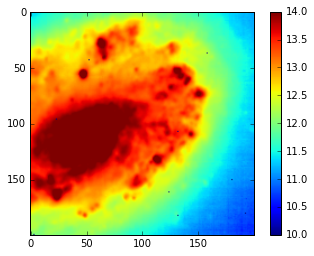

In [11]:
filename = "muse_scipost_N_SN2009bb_DATACUBE_FINAL_IFU_001_zap.fits"
data = fits.open(filename)
image = data[1].data
header = data[1].header
del data
image = image[:, 100:300, 20:220]
image2D = np.sum(image, axis = 0)
image2D[np.invert(np.isfinite(image2D))] = 0
image2D = np.arcsinh(image2D)
plt.imshow(image2D, clim = (10, 14))
plt.colorbar()

In [12]:
image[1, 1, 1].dtype

dtype('float32')

In [12]:
new_cube = pickle.load( open( "new_cube.p", "rb" ) )

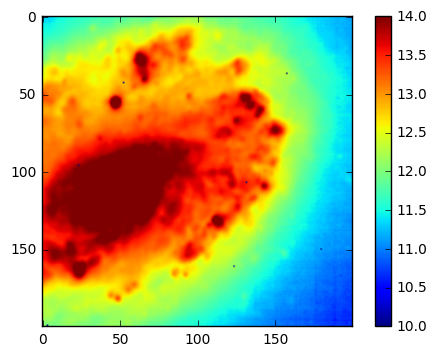

In [42]:
cube2D = np.sum(new_cube, axis = 0)
cube2D[np.invert(np.isfinite(cube2D))] = 0
cube2D = np.arcsinh(cube2D)
plt.imshow(cube2D, clim = (10, 14))
plt.colorbar()

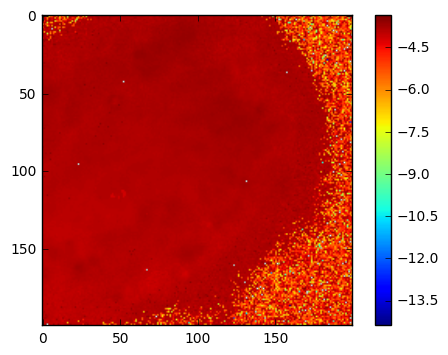

In [43]:
plt.imshow(np.log(image2D-cube2D))
plt.colorbar()

# process the data cube with redshift information

In [14]:
#new lambdas cube
lambdas_cube = np.zeros([3681, 200, 200])

for i in range(200):
    for j in range(200):
        lambdas_cube[:,i,j] = np.log(lambdas/(1+redshift[i,j]))

In [36]:
redshift

array([[  1.12472125e-02,   1.30471426e-02,   1.00073253e-02, ...,
         -9.32341674e-03,   1.25328768e-02,   1.33042754e-02],
       [  8.86452036e-03,   1.35614083e-02,   3.53322655e-03, ...,
          1.09900797e-02,   2.76956089e-03,  -7.13474824e-03],
       [  6.74418574e-04,   9.81685778e-03,   9.81685778e-03, ...,
         -6.66335715e-05,   1.09900797e-02,  -9.99176050e-03],
       ..., 
       [  9.43592281e-03,   9.43592281e-03,   9.43592281e-03, ...,
          9.62639029e-03,   6.57891056e-03,   4.67423573e-03],
       [  1.25328768e-02,   9.43592281e-03,   9.24545533e-03, ...,
          2.00769096e-03,  -3.23766437e-04,  -3.15222796e-03],
       [  1.33042754e-02,   9.24545533e-03,   9.24545533e-03, ...,
         -3.51586606e-03,  -1.42072374e-03,   9.43592281e-03]])

In [37]:
preprocessing.scale(redshift)

array([[ 1.13368003,  1.99683897,  0.39180718, ..., -2.04712384,
         1.70489063,  1.94566535],
       [-0.38721686,  2.28956966, -5.21446526, ...,  1.3174334 ,
         0.0807049 , -1.57853942],
       [-5.61504299,  0.15809399,  0.22687108, ..., -0.51390789,
         1.44823714, -2.07116061],
       ..., 
       [-0.0224848 , -0.05874208, -0.10300112, ...,  1.09156332,
         0.71441289,  0.45762817],
       [ 1.95433278, -0.05874208, -0.26793723, ..., -0.17033416,
        -0.43388852, -0.89185217],
       [ 2.44672444, -0.16716011, -0.26793723, ..., -1.08520984,
        -0.6163739 ,  1.27866349]])

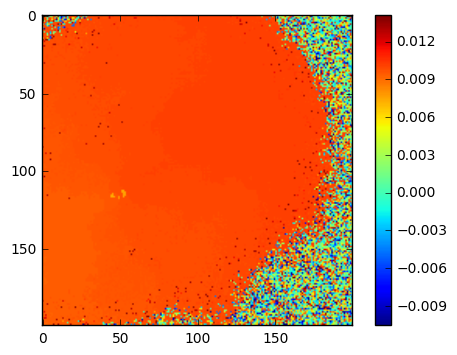

In [35]:
plt.imshow(redshift)
plt.colorbar()

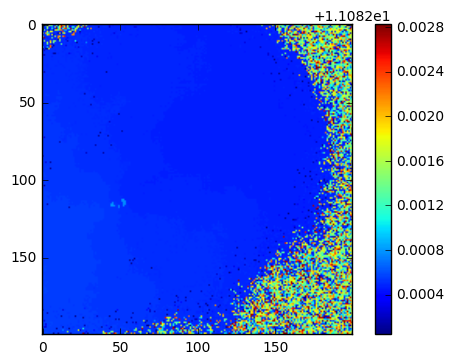

In [40]:
lambdas2D = np.sum(lambdas_cube, axis = 0)
lambdas2D[np.invert(np.isfinite(lambdas2D))] = 0
lambdas2D = np.arcsinh(lambdas2D)
plt.imshow(lambdas2D)
plt.colorbar()

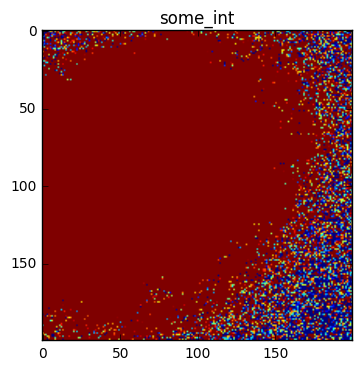

In [32]:
import ipywidgets as widgets
from IPython.display import display

def demo(some_int):
    image2D = image[some_int]
    plt.imshow(image2D, clim = (5, 14))
    plt.title("some_int")
    
a_slider = widgets.widgets.IntSlider(min=0, max=3600, step=1, value=0)

w=widgets.interactive(demo, some_int=a_slider)
display(w)


In [186]:
import os

# Importing spec files (templates)

In [187]:
spec_filelist = os.listdir("/home/apps/astro/data/muse/BasesDir/")

In [188]:
spec_filelist[:4]

['cb2007_hr_milesm_m62_chab_ssp_138.spec',
 'cb2007_hr_milesm_m32_chab_ssp_201.spec',
 'cb2007_hr_milesm_m42_chab_ssp_201.spec',
 'cb2007_hr_milesm_m62_chab_ssp_213.spec']

In [189]:
bulk_load = {}

for filename in spec_filelist:
    if filename[-4:]=="spec":
        data = []
        with open("/home/apps/astro/data/muse/BasesDir/"+filename) as f:
            for line in f:
                split_line = line.split()
                data.append(split_line)
        bulk_load[filename] = data


In [190]:
metadata_load = []

with open("/home/apps/astro/data/muse/BasesDir/Base.CB07.vall.4m") as f:
    for line in f:
        split_line = line.split()
        metadata_load.append(split_line)

# pd.DataFrame(metadata_load, li)

In [191]:
filename = []
age = []
metalicity = []
for row in metadata_load:
    if row[0][-4:]=="spec":
        filename.append(row[0])
        age.append(float(row[1]))
        metalicity.append(float(row[2]))

metadata_df = pd.DataFrame(zip(filename,age,metalicity), columns=['filename','age','metalicity'])
metadata_df.head()

,filename,age,metalicity
0,cb2007_hr_milesm_m42_chab_ssp_020.spec,1000000,0.004
1,cb2007_hr_milesm_m42_chab_ssp_045.spec,3160000,0.004
2,cb2007_hr_milesm_m42_chab_ssp_055.spec,5010000,0.004
3,cb2007_hr_milesm_m42_chab_ssp_061.spec,6610000,0.004
4,cb2007_hr_milesm_m42_chab_ssp_070.spec,10000000,0.004


In [192]:
subset = []
for row in metadata_load:
    if row[0][-4:]=="spec":
        subset.append(row[0])


In [193]:
def clean_bulk(data):
    lamb_list = []
    flux_list = []
    for lamb,flux in data:
        lamb_list.append(float(lamb))
        flux_list.append(float(flux))

    lamb_4000 = 0
    for ind, lamb in enumerate(lamb_list):
        lamb_4000 += 1
        if lamb>4000:
            break

    lamb_10000 = 0
    for ind, lamb in enumerate(lamb_list):
        lamb_10000 += 1
        if lamb>10000:
            break
            
    return lamb_list[lamb_4000:lamb_10000], flux_list[lamb_4000:lamb_10000]

# fmt
bulk_fmt = {}

for filename, data in bulk_load.items():
    if filename in subset:
        bulk_fmt[filename] = clean_bulk(data)

# longitudinal
for_csv = []
for filename, data in bulk_fmt.items():
    to_append = zip([filename]*len(data[0]), data[0], data[1])
    for_csv.extend(to_append)

    
# plt.plot(
#     lamb_list[lamb_4000:lamb_10000],
#     flux_list[lamb_4000:lamb_10000],
# )
 
# plt.xlim([4000,10000])
    
bulk_data_df = pd.DataFrame(for_csv, columns=["filename", "wavelength", "flux"])
bulk_data_df.to_csv("for_pivot.csv")

# Spine stuff

In [194]:
bulk_data_df.groupby("filename").count().reset_index().count()

filename      66
wavelength    66
flux          66
dtype: int64

In [9]:
# spectral wavelengths
CRVAL3 = float(header["CRVAL3"])
CRPIX3 = float(header["CRPIX3"])
CUNIT3 = header["CUNIT3"]
CD31 = float(header["CD3_1"])
CD32 = float(header["CD3_2"])
CD33 = float(header["CD3_3"])
NAXIS3 = int(header["NAXIS3"])
lambdas = np.array(CRVAL3 + CD33 * (np.arange(NAXIS3) - CRPIX3))
########### modification
#lambdas = lambdas/1.0098

In [62]:
get_spline("cb2007_hr_milesm_m42_chab_ssp_020.spec", lambdas).shape

(3681,)

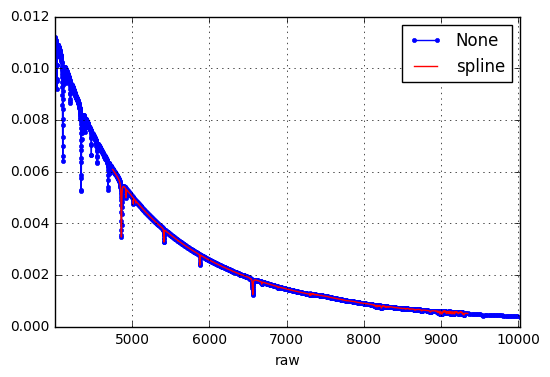

In [44]:
from scipy.interpolate import spline

# example for one
def get_spline(filename, lambdas):
    df_filename = bulk_data_df[bulk_data_df["filename"]==filename]
    spline_out = spline(df_filename["wavelength"].values, df_filename["flux"].values, xnew=lambdas, order=1)
    return spline_out

# sanity
df_181 = bulk_data_df[bulk_data_df["filename"]=="cb2007_hr_milesm_m42_chab_ssp_020.spec"]
df_181.plot("wavelength","flux",marker='.',label='raw')
# spline
plt.plot(lambdas, get_spline("cb2007_hr_milesm_m42_chab_ssp_020.spec", lambdas), color='red', label='spline')
plt.legend()


In [10]:
import pickle

In [221]:
matrix_out = np.zeros((len(subset), len(lambdas)))
for ind, filename in enumerate(subset):
    matrix_out[ind, :] = get_spline(filename, lambdas)

package = {}
package["lambda_domain"] = lambdas
package["filename_domain"] = subset
package["templates_filenamex_lambday"] = matrix_out

pickle.dump(package, open( "templates.p", "wb" ) )

In [222]:
test_dict = pickle.load( open( "templates.p", "rb" ) )


<font color="blue">

## redshift, new set of lambdas 

In [21]:
lambdas_dict = {}

for pix in pixel_list:
    lambdas_dict[pix] = lambdas/(1+redshift[pix])

In [22]:
lambdas_dict[(1,2)].shape

(3681,)

<font color="blue">

### useless-- interpolation of the original data cube, find new data cube with new lambdas

In [116]:
len(lambdas_dict[(0,1)][np.where(np.logical_and(lambdas_dict[(0,1)]>=range_left, lambdas_dict[(0,1)]<=range_right))[0]][0:3499])

3499

In [119]:
np.zeros([3499, 200, 200]).shape

(3499, 200, 200)

In [160]:
#new data cube
cube = np.zeros([3499, 200, 200])

for i in range(200):
    for j in range(200):
        x_new = lambdas_dict[(i,j)][np.where(np.logical_and(lambdas_dict[(i,j)]>=range_left, lambdas_dict[(i,j)]<=range_right))[0]][0:3499]
        cube[:,i,j] = spline(lambdas, image[:,i,j], xnew=x_new, order=1)

In [167]:
### new_lambda_dict

new_lambdas_dict = {}

for pix in pixel_list:
    new_lambdas_dict[pix] = lambdas_dict[pix][np.where(np.logical_and(lambdas_dict[pix]>=range_left, lambdas_dict[pix]<=range_right))[0]][0:3499]

In [159]:
x_new = lambdas_dict[(10,20)][np.where(np.logical_and(lambdas_dict[(10,20)]>range_left, lambdas_dict[(10,20)]<range_right))[0]][0:3499]
np.nonzero(spline(lambdas, image[:,0,1], xnew=x_new, order=1))

(array([   9,   10,   11, ..., 3496, 3497, 3498]),)

In [85]:
np.zeros([10,10]).max()

0.0

In [140]:
#### truncate the range of lambdas
ori_min = min(lambdas)
ori_max = max(lambdas)

zuixiao = np.zeros([200,200])
zuida = np.zeros([200,200])

for i in range(200):
    for j in range(200):
        zuixiao[i,j] = min(lambdas_dict[(i,j)])
        zuida[i,j] = max(lambdas_dict[(i,j)])

In [141]:
range_left = max(ori_min, zuixiao.max())
range_right = min(ori_max, zuida.min())

In [142]:
range_left

4799.1704941535754

In [143]:
range_right

9218.7164267137759

In [105]:
len(np.where(np.logical_and(lambdas >= range_left, lambdas<=range_right))[0])

3536

In [151]:
### find the min of the lambdas length after truncation

length_l = np.zeros([200,200])

for i in range(200):
    for j in range(200):
        length_l[i,j]= len(np.where(np.logical_and(lambdas_dict[(i,j)]>range_left, lambdas_dict[(i,j)]<range_right))[0])

In [152]:
length_l.min()

3498.0

In [77]:
a = spline(lambdas, image[:,1,1], xnew=lambdas_dict[(1,1)], order=1)
np.count_nonzero(a)

3577

-----

<font color = "red">

## interpolation of new lambdas and original flux; calculate the points corresponding to the original lambdas

In [199]:
#new data cube
new_cube = np.zeros([3681, 200, 200])

for i in range(200):
    for j in range(200):
        new_cube[:,i,j] = spline(lambdas_dict[(i,j)], image[:,i,j], xnew=lambdas, order=1)

In [214]:
new_cube.shape

(3681, 200, 200)

In [217]:
pickle.dump( new_cube, open( "new_cube.p", "wb" ) )

In [218]:
pickle.load( open( "new_cube.p", "rb" ) )

array([[[  1.58913207,  20.72857857,   4.47775602, ...,   0.        ,
           4.54448605,   7.22092199],
        [ 11.73747063,  17.02176666,   2.95370889, ...,  -4.10243607,
          25.87231445,   0.        ],
        [  9.19278526,  27.17206001,   1.76886988, ...,   0.        ,
          13.33965588,   0.        ],
        ..., 
        [ 33.90075684,   9.47557068,   9.44283295, ...,  -0.20654914,
          -8.94043732,  -3.75149155],
        [ 10.58526993,  33.72238922,  36.58388519, ...,   6.65662432,
           0.        ,   0.        ],
        [ 13.75508595,  25.86943436,  20.96595955, ...,   0.        ,
           0.        ,   1.757357  ]],

       [[ -0.35426769,   1.44967449,  15.10449409, ...,   0.        ,
           9.15777779,   4.50656509],
        [ 17.41717148,   8.27146149,   2.79524231, ...,  -1.59939945,
          17.71251297,   0.        ],
        [ 32.52588272,  10.42730808,   9.5647459 , ...,  14.51014519,
           7.75099802,   0.        ],
        ...,

In [224]:
matrix_out.shape

(66, 3681)

# NNLS

# EXPERIMENT WITH A SINGLE PIXEL

(4748.47607421875, 9348.47607421875)

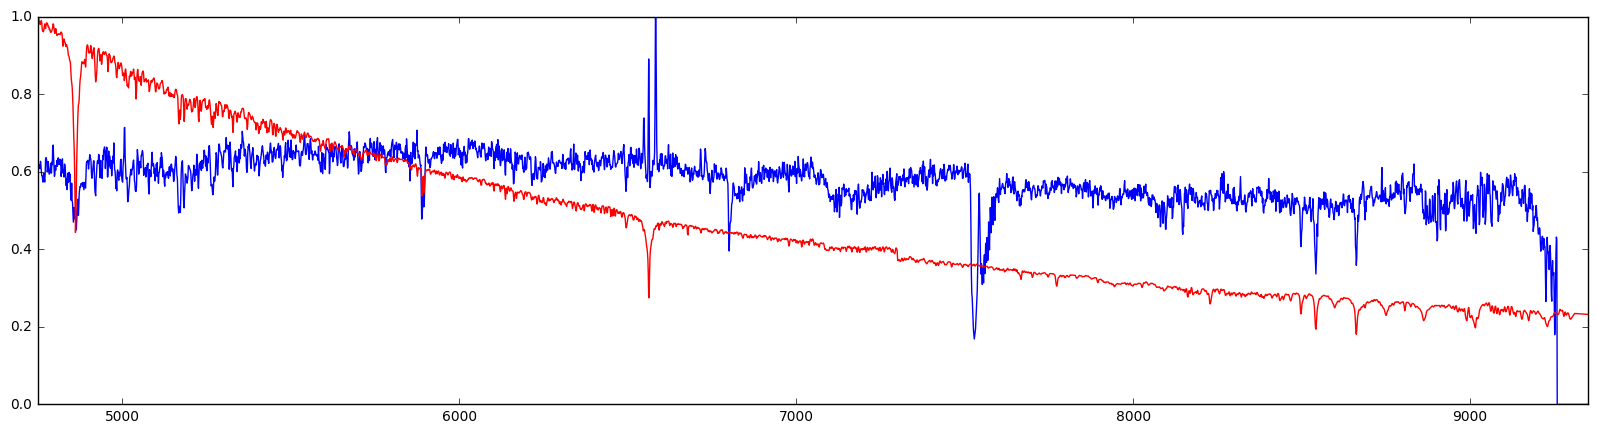

In [225]:
plt.figure(figsize=(20,5))
plt.plot(lambdas, new_cube[:,120, 50]/np.max(new_cube[:,120, 50]))
plt.plot(lambdas, matrix_out[25,:]/np.max(matrix_out[25,:]), color='red')
plt.xlim([min(lambdas), max(lambdas)])

In [226]:
from scipy.optimize import nnls

In [228]:
# constrain flux to be non-negative
new_cube[new_cube < 0] = 0
new_cube[new_cube == np.nan] = 0
new_cube[new_cube == np.inf] = 1400

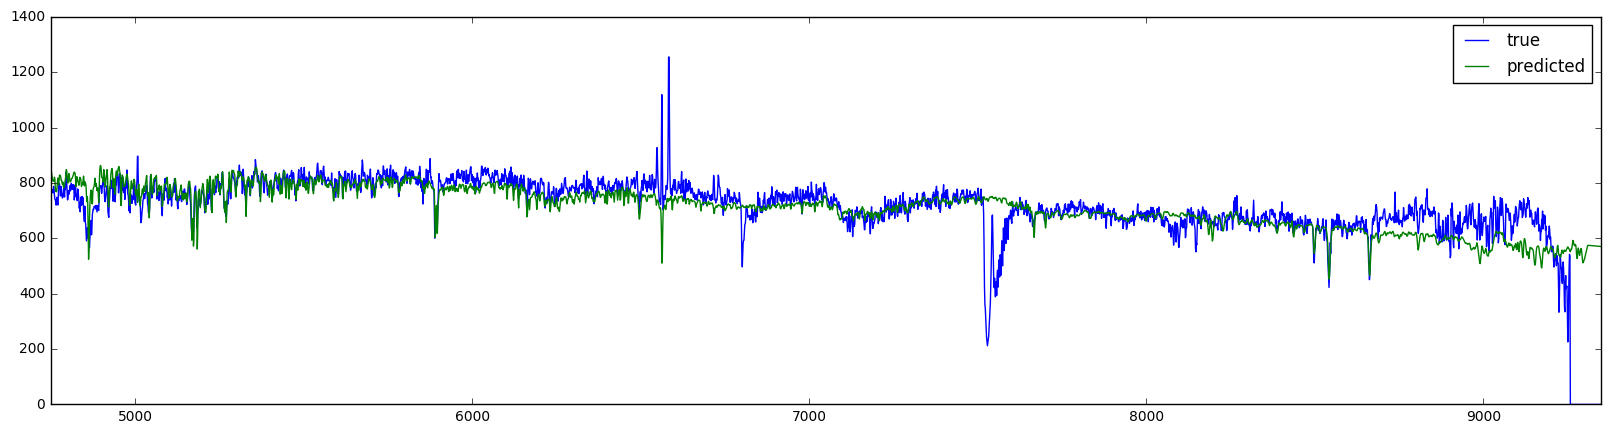

In [232]:
plt.figure(figsize=(20,5))
weights = nnls(A = matrix_out.T, b=new_cube[:,120,50])[0]
plt.plot(lambdas, new_cube[:,120, 50], label='true')
plt.plot(lambdas, np.dot(weights, matrix_out), label='predicted')
plt.xlim([min(lambdas), max(lambdas)])
plt.legend()

In [233]:
weights_norm = weights/np.sum(weights)
analysis_df = pd.DataFrame(zip(subset, weights_norm), columns=['filename', 'weight'])
analysis_df.sort("weight",ascending=False).head(10)

,filename,weight
16,cb2007_hr_milesm_m42_chab_ssp_213.spec,0.999753
20,cb2007_hr_milesm_m52_chab_ssp_061.spec,0.000247
43,cb2007_hr_milesm_m62_chab_ssp_130.spec,0.000000
48,cb2007_hr_milesm_m62_chab_ssp_181.spec,0.000000
47,cb2007_hr_milesm_m62_chab_ssp_158.spec,0.000000
46,cb2007_hr_milesm_m62_chab_ssp_150.spec,0.000000
45,cb2007_hr_milesm_m62_chab_ssp_139.spec,0.000000
44,cb2007_hr_milesm_m62_chab_ssp_135.spec,0.000000
0,cb2007_hr_milesm_m42_chab_ssp_020.spec,0.000000
49,cb2007_hr_milesm_m62_chab_ssp_213.spec,0.000000


# NOW ALL PIXELS

In [11]:
pixel_list = []
for i in np.arange(0,200):
    for j in np.arange(0,200):
        pixel_list.append((i,j))
pixel_list[:5]

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4)]

In [235]:
%%time
weight_dict = {}
for pix in pixel_list:
    try:
        weight_dict[pix] = nnls(A=matrix_out.T, b=new_cube[:,pix[0],pix[1]])[0]
    except:
        weight_dict[pix] = "FAILURE"


CPU times: user 6min 38s, sys: 114 ms, total: 6min 38s
Wall time: 6min 39s


In [236]:
pickle.dump(weight_dict, open( "weights.p", "wb" ) )


In [237]:
def plot_prediction(pix):
    plt.figure(figsize=(20,5))
    weights = nnls(A=matrix_out.T, b=new_cube[:,pix[0], pix[1]])[0]
    plt.plot(lambdas, new_cube[:,pix[0], pix[1]], label='true')
    plt.plot(lambdas, np.dot(weights, matrix_out), label='predicted')
    plt.xlim([min(lambdas), max(lambdas)])
    plt.legend()
    plt.xlabel('lambda')
    plt.ylabel('flux')
    plt.title("pixel="+str(pix))
    

In [238]:
def construct_ranked_df(pix):
    weights = nnls(A=matrix_out.T, b=new_cube[:,pix[0], pix[1]])[0]
    weights_norm = weights/np.sum(weights)
    analysis_df = pd.DataFrame(zip(subset, weights_norm), columns=['filename', 'weight'])
    analysis_df = analysis_df.merge(metadata_df)
    return analysis_df.sort("weight",ascending=False)


In [239]:
def plot_list_of_filenames(filenames):
    plt.figure(figsize=(20,10))
    for i, filename in enumerate(filenames):
        plt.subplot(len(filenames), 1, i+1)
        get_ind = subset.index(filename)
        plt.plot(lambdas, matrix_out[get_ind,:])
        plt.xlim([min(lambdas), max(lambdas)])
        plt.xlabel('lambda')
        plt.ylabel('flux')
        plt.title(filename)
        

In [240]:
PIX = [100,50]
# PIX = [100,100]

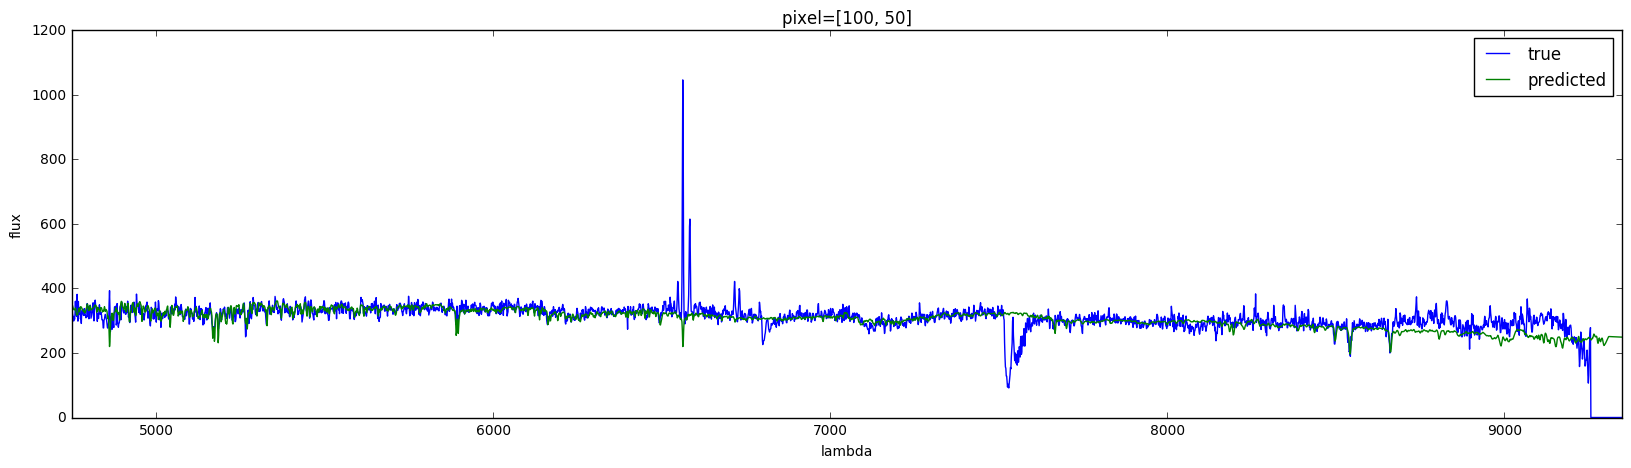

In [241]:
plot_prediction(PIX)

In [242]:
analysis_df = construct_ranked_df(PIX)
analysis_df.head(5)

,filename,weight,age,metalicity
16,cb2007_hr_milesm_m42_chab_ssp_213.spec,0.999875,18000000000,0.004
20,cb2007_hr_milesm_m52_chab_ssp_061.spec,0.000125,6610000,0.008
43,cb2007_hr_milesm_m62_chab_ssp_130.spec,0.000000,508800000,0.020
48,cb2007_hr_milesm_m62_chab_ssp_181.spec,0.000000,10000000000,0.020
47,cb2007_hr_milesm_m62_chab_ssp_158.spec,0.000000,4250000000,0.020


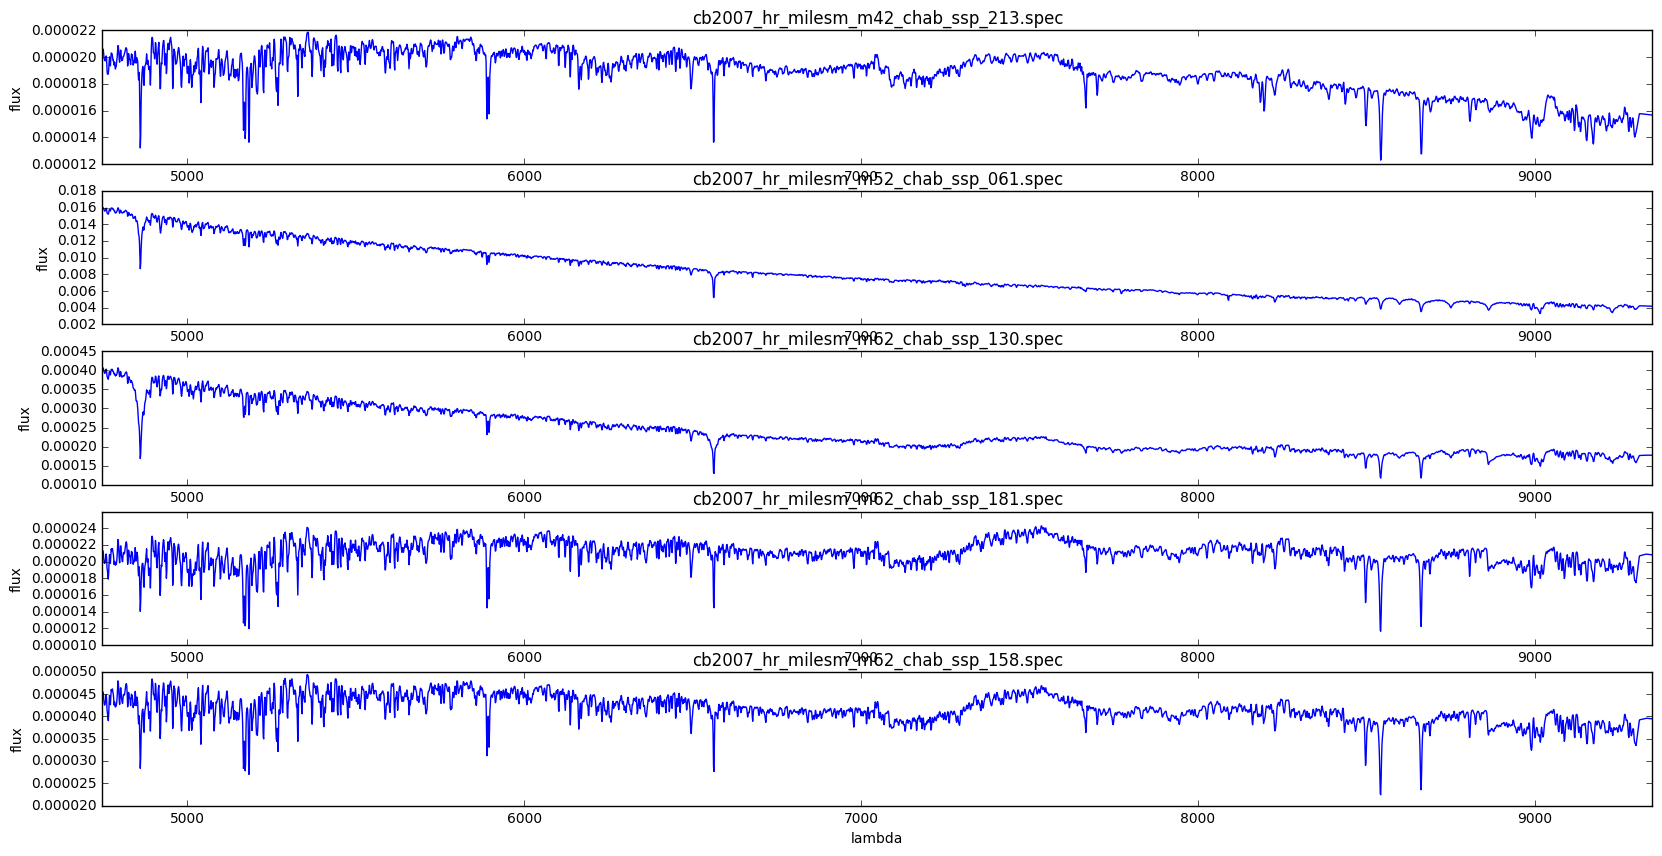

In [243]:
list_to_plot = analysis_df.head(5).filename.values
plot_list_of_filenames(list_to_plot)

# Infer age, metalicity

In [258]:
a = 0
for pix in pixel_list:
    if weight_dict[pix]=="FAILURE":
        a +=1

/home/apps/astro/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()


In [281]:
metalicity_dict = {}

for pix, weight_vect in weight_dict.items():
    if weight_vect == "FAILURE":
        weight_vect = weight_dict[(0,0)]
    metalicity_dict[pix] = np.dot(weight_vect, metadata_df.metalicity.values)

# populate matrix to plot
weight_len = np.sqrt(len(weight_dict.keys()))
metalicity_matrix = np.zeros((weight_len,weight_len))

for pix, metalicity_val in metalicity_dict.items():
    # come back to me. HARD CODEY /2. 
    metalicity_matrix[int(pix[0]/1.0), int(pix[1]/1.)] = metalicity_val

/home/apps/astro/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future


In [282]:
age_dict = {}

for pix, weight_vect in weight_dict.items():
    if weight_vect == "FAILURE":
        weight_vect = weight_dict[(0,0)]
    age_dict[pix] = np.dot(weight_vect, metadata_df.age.values)

# populate matrix to plot
weight_len = np.sqrt(len(weight_dict.keys()))
age_matrix = np.zeros((weight_len,weight_len))

for pix, age_val in age_dict.items():
    # come back to me. HARD CODEY /2. 
    age_matrix[int(pix[0]/1.), int(pix[1]/1.)] = age_val

/home/apps/astro/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future


In [283]:
highest_wgt_dict = {}

for pix, weight_vect in weight_dict.items():
    if weight_vect == "FAILURE":
        weight_vect = weight_dict[(0,0)]
    highest_wgt_dict[pix] = np.max(weight_vect/np.sum(weight_vect))

# populate matrix to plot
weight_len = np.sqrt(len(weight_dict.keys()))
highest_wgt_matrix = np.zeros((weight_len,weight_len))

for pix, highest_wgt_val in highest_wgt_dict.items():
    # come back to me. HARD CODEY /2. 
    highest_wgt_matrix[int(pix[0]/1.), int(pix[1]/1.)] = highest_wgt_val

highest_wgt_matrix0 = highest_wgt_matrix.copy()

/home/apps/astro/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future


In [284]:
highest_wgt_dict = {}

for pix, weight_vect in weight_dict.items():
    if weight_vect == "FAILURE":
        weight_vect = weight_dict[(0,0)]
    highest_wgt_dict[pix] = np.argmax(weight_vect/np.sum(weight_vect))

# populate matrix to plot
weight_len = np.sqrt(len(weight_dict.keys()))
highest_wgt_matrix = np.zeros((weight_len,weight_len))

for pix, highest_wgt_val in highest_wgt_dict.items():
    # come back to me. HARD CODEY /2. 
    highest_wgt_matrix[int(pix[0]/1.), int(pix[1]/1.)] = highest_wgt_val
    

/home/apps/astro/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
using a non-integer number instead of an integer will result in an error in the future
using a non-integer number instead of an integer will result in an error in the future


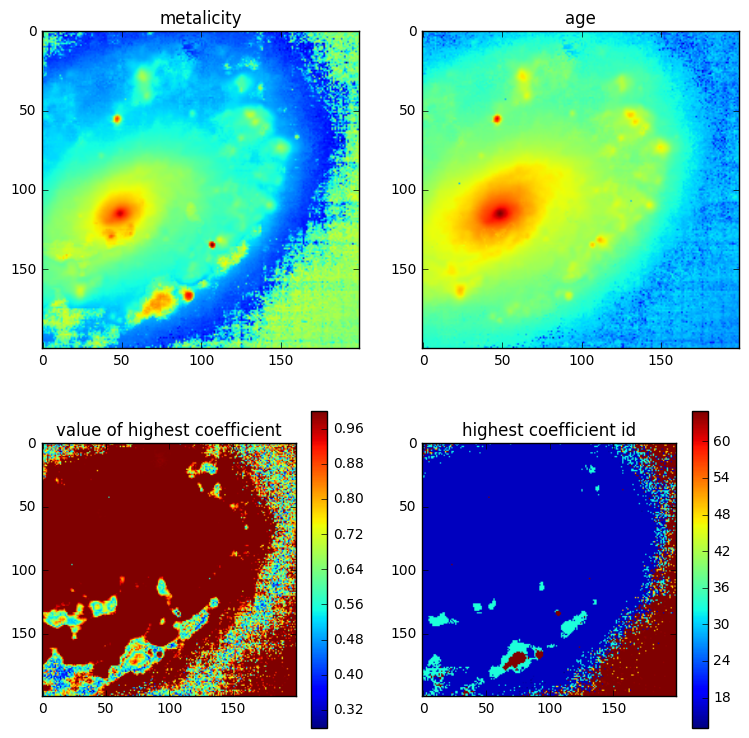

In [285]:
plt.figure(figsize=(9,9))
plt.subplot(2,2,1)
plt.title('metalicity')
plt.imshow(np.log(metalicity_matrix));
plt.subplot(2,2,2)
plt.title('age')
plt.imshow(np.log(age_matrix));
plt.subplot(2,2,3)
plt.title('value of highest coefficient')
plt.imshow(highest_wgt_matrix0);
plt.colorbar()
plt.subplot(2,2,4)
plt.title('highest coefficient id')
plt.imshow(highest_wgt_matrix);
plt.colorbar()


In [278]:
import collections
collections.Counter(np.concatenate(highest_wgt_matrix)


SyntaxError: invalid syntax (<ipython-input-278-d957f1138868>, line 2)

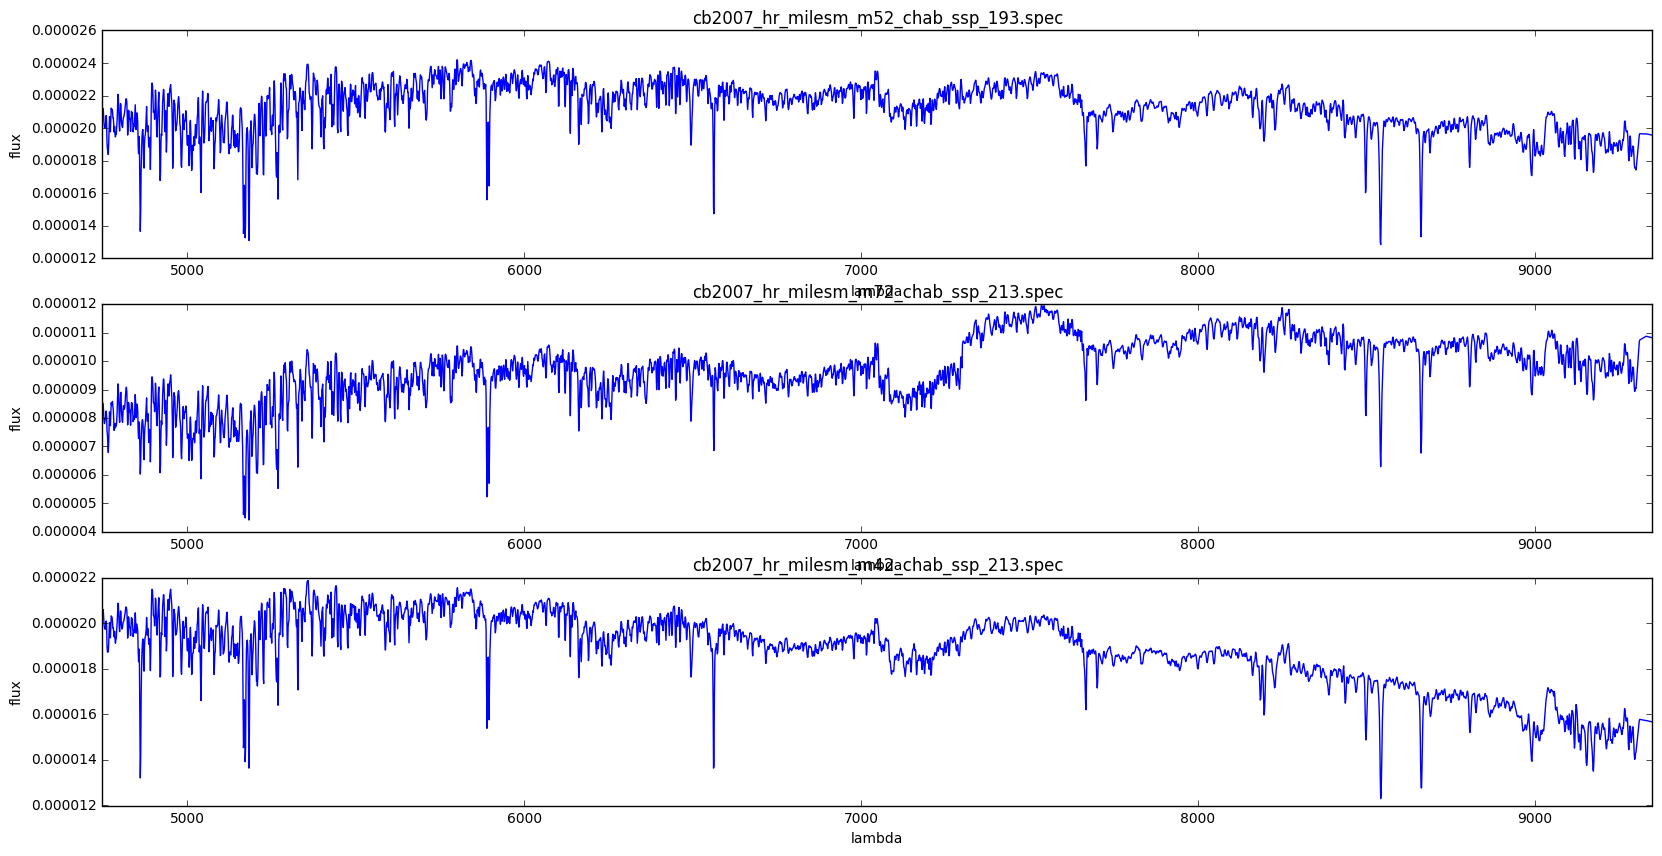

In [279]:
plot_list_of_filenames([subset[32], subset[65], subset[16]])

In [280]:
metadata_df[[val in [subset[32], subset[65], subset[16]] for val in metadata_df["filename"].values]]

,filename,age,metalicity
16,cb2007_hr_milesm_m42_chab_ssp_213.spec,18000000000,0.004
32,cb2007_hr_milesm_m52_chab_ssp_193.spec,13000000000,0.008
65,cb2007_hr_milesm_m72_chab_ssp_213.spec,18000000000,0.050


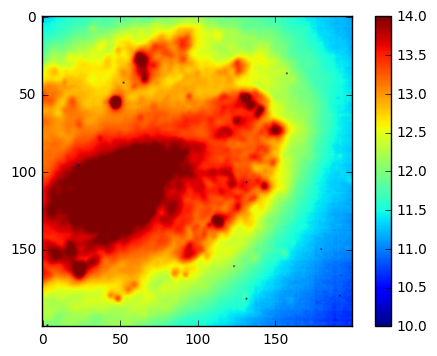

In [183]:
plt.imshow(image2D, clim = (10, 14));
plt.colorbar()

In [11]:
from IPython.html.widgets import interactive
from IPython.display import display
import IPython.html.widgets as widgets

def sigmoid_demo(a=5,b=1):
    x = np.linspace(0,10,256)
    s = 1/(1+np.exp(-(x-a)/(b+0.1))) # +0.1 to avoid dividing by 0
    sn = 100.0*(s-min(s))/(max(s)-min(s)) # normalize sigmoid to 0-100
    fig = plt.figure(figsize=(24,6))
    ax1 = fig.add_subplot(2, 1, 1)
    ax1.set_xticks([])
    ax1.set_yticks([])
    plt.plot(x,sn,lw=2,color='black')
    plt.xlim(x.min(), x.max())

a_slider = widgets.IntRangeSlider(min=-5, max=5, step=1, value=0)
w=widgets.interactive(sigmoid_demo, a=a_slider)
display(w)

ValueError: operands could not be broadcast together with shapes (256,) (2,) 

10.8111085796 15.0137771416


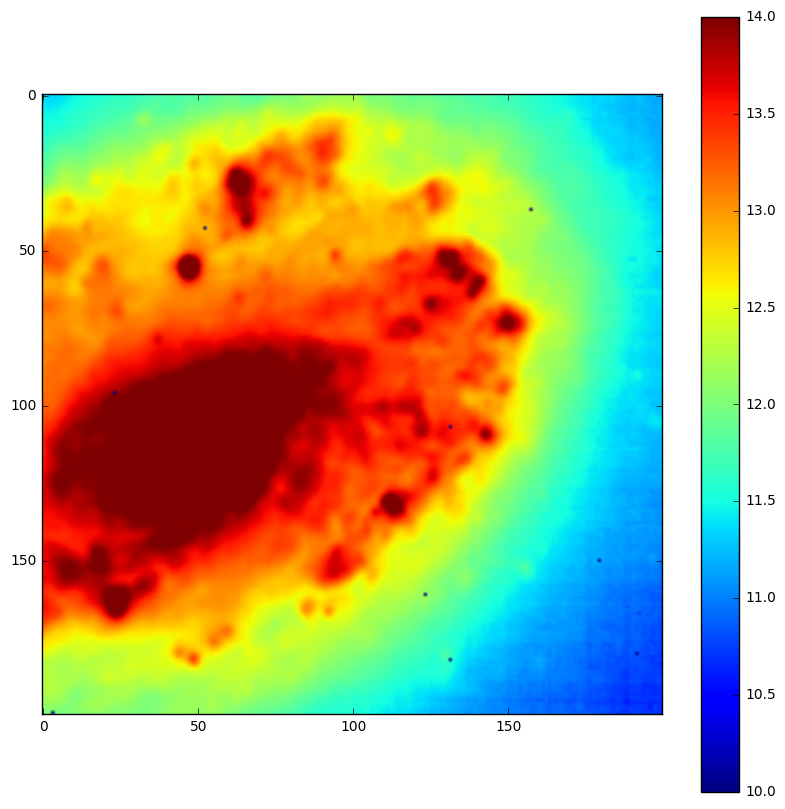

In [32]:
#filename = "muse_scipost_N_ASASSN14lp_1_new_DATACUBE_FINAL_IFU_004_zap_all.fits"
filename = "muse_scipost_N_SN2009bb_DATACUBE_FINAL_IFU_001_zap.fits"
#filename = "muse_scipost_N_SN2004ef_DATACUBE_FINAL_IFU_002_skysub.fits"
data = fits.open(root_path+filename)
image = data[1].data
header = data[1].header
del data
#image = image[:, 63:263, 100:300]
image = image[:, 100:300, 20:220]
(nl, nx, ny) = np.shape(image)
image2D = np.sum(image, axis = 0)
image2D[np.invert(np.isfinite(image2D))] = 0
image2D = np.arcsinh(image2D)
fig, ax = plt.subplots(figsize = (10, 10))
l1, l2 = (np.percentile(image2D.flatten(), 1), np.percentile(image2D.flatten(), 99))
print(l1, l2)
color = ax.imshow(image2D, clim = (10, 14));
fig.colorbar(color)


In [19]:
# spectral wavelengths
CRVAL3 = float(header["CRVAL3"])
CRPIX3 = float(header["CRPIX3"])
CUNIT3 = header["CUNIT3"]
CD31 = float(header["CD3_1"])
CD32 = float(header["CD3_2"])
CD33 = float(header["CD3_3"])
NAXIS3 = int(header["NAXIS3"])
lambdas = np.array(CRVAL3 + CD33 * (np.arange(NAXIS3) - CRPIX3))

(4748.47607421875, 9348.47607421875)

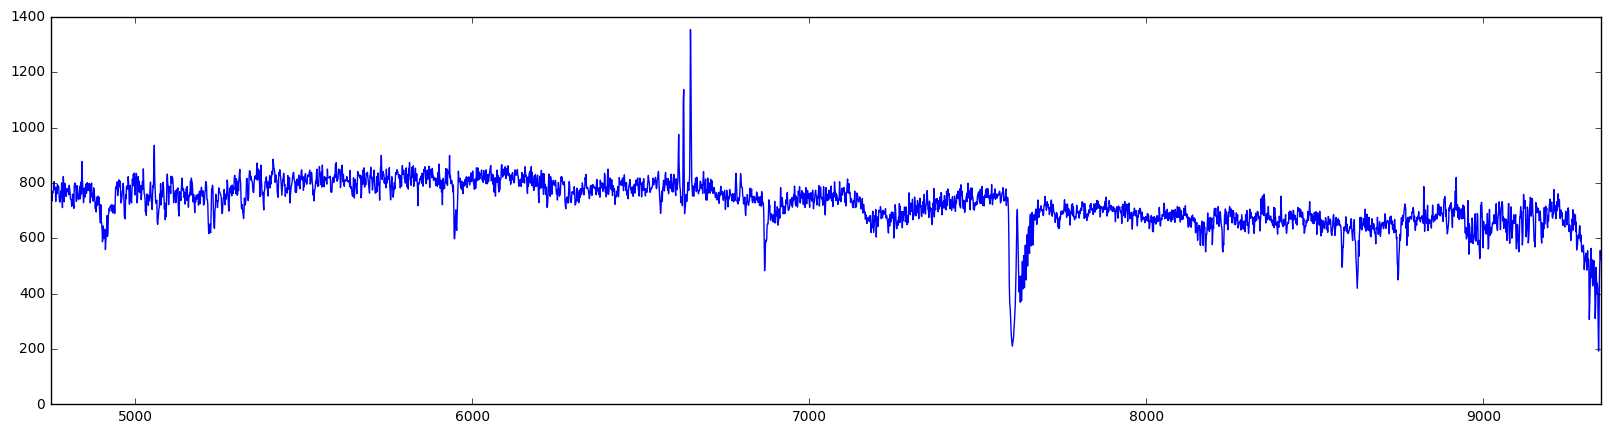

In [20]:
fig, ax = plt.subplots(figsize = (20, 5))
spectra = image[:, 120, 50]
ax.plot(lambdas, spectra)
ax.set_xlim(min(lambdas), max(lambdas))

In [41]:
len(lambdas)

3681

2.0 2.0


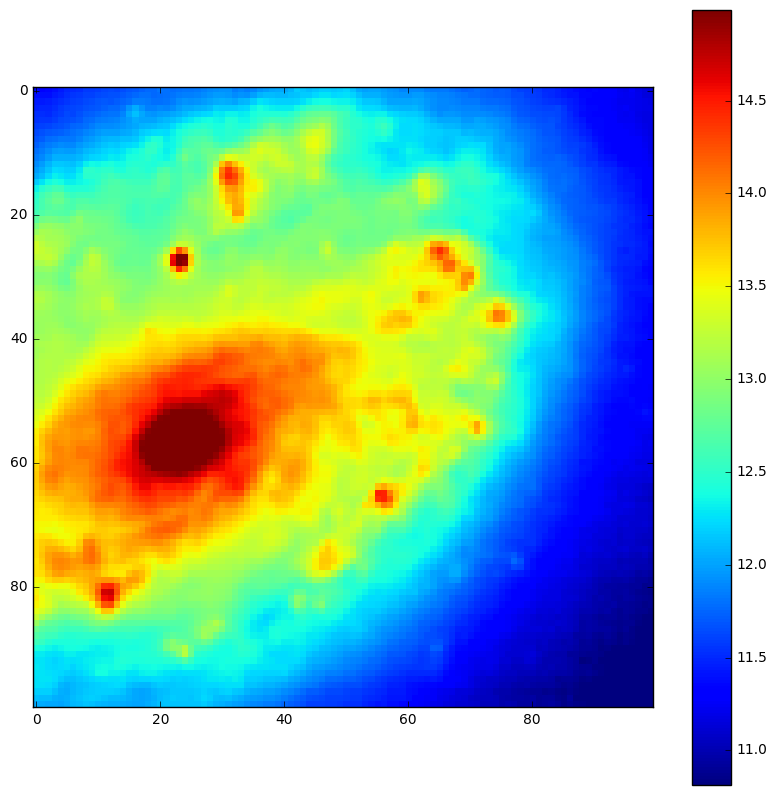

In [21]:
nn = 100
dnx = nx / nn
dny = ny / nn
print(dnx, dny)
image2Dsmall = np.zeros((nn, nn))

for i in range(nn):
    for j in range(nn):
        image2Dsmall[i, j] = np.median(image2D[int(i * dnx): int((i + 1) * dnx), int(j * dny): int((j + 1) * dny)].flatten())
fig, ax = plt.subplots(figsize = (10, 10))
l1, l2 = (np.percentile(image2Dsmall.flatten(), 1), np.percentile(image2Dsmall.flatten(), 99))
color = ax.imshow(image2Dsmall, interpolation = 'nearest', clim = (l1, l2));
fig.colorbar(color)

In [22]:
# get spectral grid
if docompute:
    spec = np.zeros((nl, nn, nn))
    for i in range(nn):
        for j in range(nn):
            spec[:, i, j] = np.sum(image[:, int(i * dnx): int((i + 1) * dnx), int(j * dny): int((j + 1) * dny)], axis = (1, 2))
    del image, image2D

In [23]:
# Here I save the spatially reduced spectra

if docompute:
    np.save("spec_%s.npy" % filename.replace(".fits", ""), spec)
    np.save("lambdas_%s.npy" % filename.replace(".fits", ""), lambdas)

In [24]:
# Start here when spectra have been extracted
spec = np.load("spec_%s.npy" % filename.replace(".fits", ""))
lambdas = np.load("lambdas_%s.npy" % filename.replace(".fits", ""))
(nl, nx, ny) = np.shape(spec)
nn = nx

### Smooth spectra 
##### (not in the end, just testing)

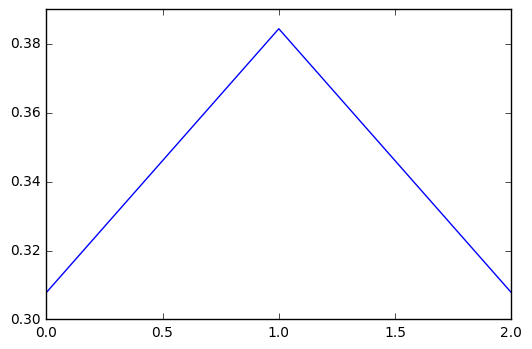

In [25]:
nk = 3
kernel = np.array(range(nk))
kernel = norm.pdf(kernel - (nk - 1)/2., scale = nk / 2)
kernel = kernel / np.sum(kernel.flatten())
fig, ax = plt.subplots()
ax.plot(range(nk), kernel)

(4748.47607421875, 7999.72607421875)

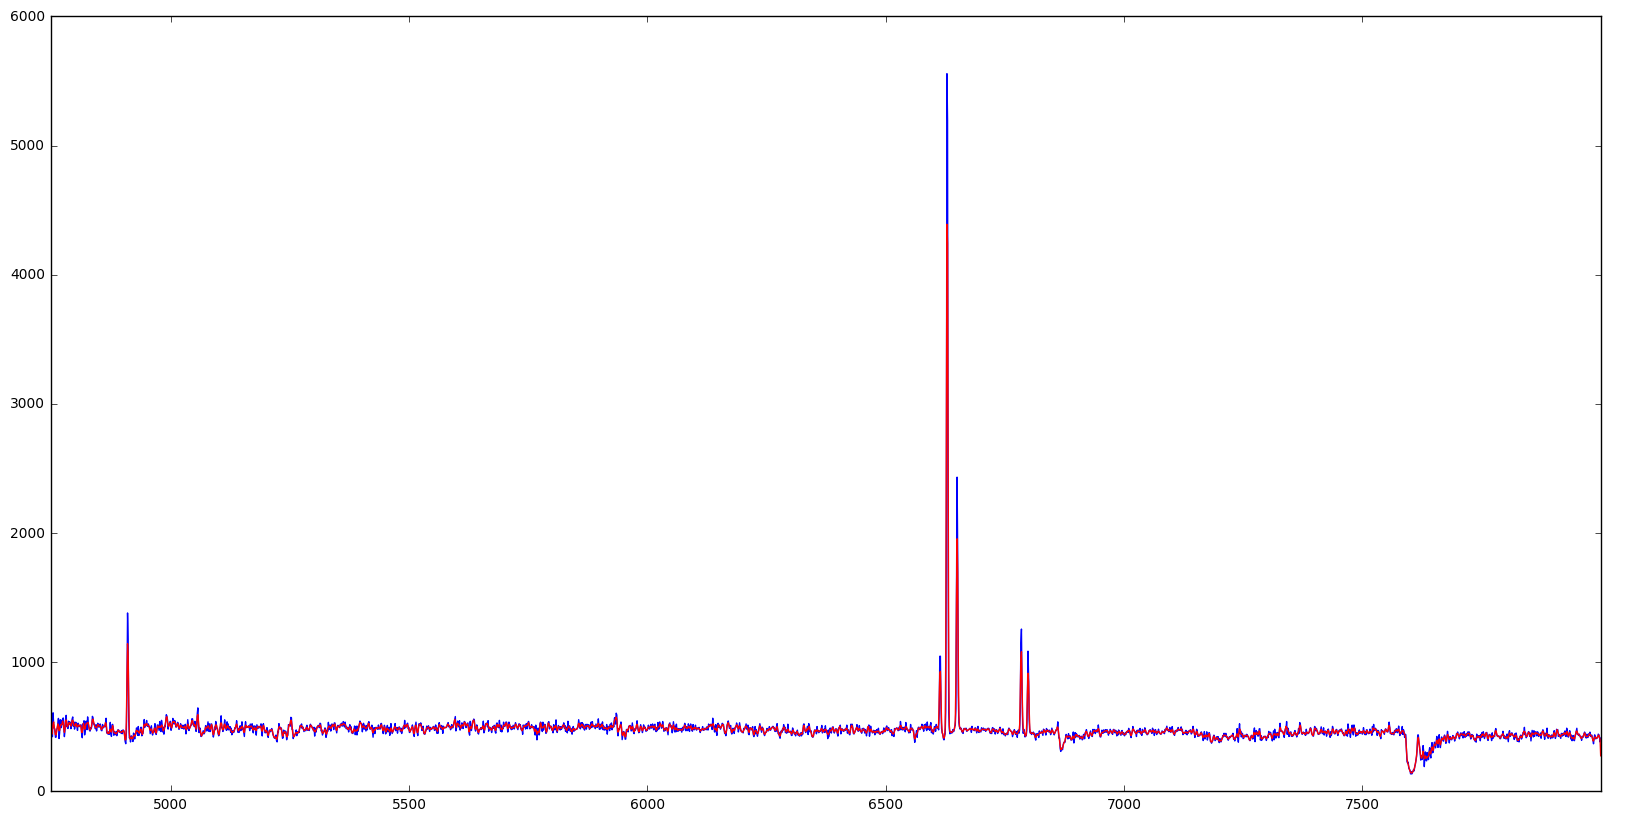

In [26]:
fig, ax = plt.subplots(figsize = (20, 10))
maskl = (lambdas < 8000) #(lambdas > 6500) & (lambdas < 7000) 
maski = (image2Dsmall > 12) # 12.5
spectrum = spec[:, 50, 50][maskl]
ax.plot(lambdas[maskl], spectrum, c = 'b')
spectrum = np.convolve(spectrum, kernel, mode = 'same')
ax.plot(lambdas[maskl], spectrum, c = 'r')
ax.set_xlim(min(lambdas[maskl]), max(lambdas[maskl]))

In [27]:
#fig, ax = plt.subplots(figsize = (20, 10))
#for i in range(nn):
#    for j in range(nn):
#        if np.random.random() > 0.1 and maski[i, j]:
#            continue
#        spectra = np.convolve(spec[:, i, j], kernel)[maskl]
#        ax.plot(lambdas[maskl], np.arcsinh(spectra), alpha = 0.1)
#ax.set_xlim(min(lambdas[maskl]), max(lambdas[maskl]))
#ax.set_xlim(6500, 7000)

In [28]:
#fig, ax = plt.subplots(ncols = nn, nrows = nn, figsize = (20, 10))
#for i in range(nn):
#    for j in range(nn):
#        if np.mod(i, 10) != 0 or np.mod(j, 10) != 0:
#            continue
#        spectra = np.convolve(spec[:, i, j], kernel)[mask]
#        ax[i, j].plot(lambdas[mask], spectra)
#        ax[i, j].set_xticks([])
#        ax[i, j].set_yticks([])
#plt.subplots_adjust(wspace = 0, hspace = 0)

### Normalize the spectra

In [29]:
X = np.reshape(spec[maskl, :, :], (len(lambdas[maskl]), nn * nn)).transpose()
maskiflat = np.reshape(maski, (nn * nn))
X = X[maskiflat, :]
X[np.invert(np.isfinite(X))] = 0
for i in range(np.sum(maskiflat)):
    X[i] = X[i] / np.average(X[i])
#X = np.arcsinh(X)
print(np.shape(X))

(7083, 2602)


## 1 dimension reduction

In [30]:
from sklearn import manifold
lr = 500
p = 1000
ee = 2
if docompute:
    tsne = manifold.TSNE(n_components=1, init='pca', random_state=0, learning_rate = lr, perplexity = p, early_exaggeration = ee)
    %time X_tsne1D = tsne.fit_transform(X)
    np.save("tsne1D.npy", X_tsne1D)
else:
    X_tsne1D = np.load("tsne1D.npy")

KeyboardInterrupt: 

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.hist(X_tsne1D, bins = 20, log = True);
print(np.shape(X_tsne1D))

In [ ]:
fig, ax = plt.subplots(ncols = 2, figsize = (20, 10))
l1, l2 = (np.percentile(image2Dsmall.flatten(), 1), np.percentile(image2Dsmall.flatten(), 99))
ax[0].imshow(image2Dsmall, interpolation = 'nearest', clim = (l1, l2));

# first component image
labelsim2D = np.zeros(np.shape(image2Dsmall)) - 2
labelsim2D[maski] = X_tsne1D[:, 0]
ax[1].imshow(labelsim2D, interpolation = 'nearest')#, clim = (l1, l2));
ax[1].contour(image2Dsmall, 10, c = 'gray', alpha = 0.8)#, clim = (l1, l2));


## 2 dimensions reduction

In [ ]:
if docompute:
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0, learning_rate = lr, perplexity = p, early_exaggeration = ee)
    %time X_tsne2D = tsne.fit_transform(X)
    np.save("tsne2D.npy", X_tsne2D)
else:
    X_tsne2D = np.load("tsne2D.npy")

In [ ]:
def t(x):
    return np.arcsinh(x / 10.)
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(t(X_tsne2D[:, 0]), t(X_tsne2D[:, 1]), lw = 0, marker = '.', alpha = 0.3);

In [ ]:
dbscan = 'HDBSCAN'
if dbscan == 'DBSCAN':
    from sklearn.cluster import DBSCAN
    db2D = DBSCAN(eps=0.7, min_samples=10, algorithm = 'ball_tree').fit(X_tsne2D)
elif dbscan == 'HDBSCAN':
    import hdbscan
    db2D = hdbscan.HDBSCAN(min_cluster_size=5, gen_min_span_tree = True, min_samples = 1).fit(t(X_tsne2D))

core_samples_mask2D = np.ones_like(db2D.labels_, dtype=bool)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db2D.labels_)) - (1 if -1 in db2D.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters_)

labels2D = np.array(db2D.labels_)
labelsim2D = np.zeros(np.shape(image2Dsmall)) - 2
tsne1 = np.zeros(np.shape(image2Dsmall))
tsne1[maski] = X_tsne2D[:, 0]
tsne2 = np.zeros(np.shape(image2Dsmall))
tsne2[maski] = X_tsne2D[:, 1]

labelsim2D[maski] = labels2D
fig, ax = plt.subplots(ncols = 2, figsize = (14, 7))
ax[1].scatter(t(X_tsne2D[labels2D > -1, 0]), t(X_tsne2D[labels2D > -1, 1]), c = labels2D[labels2D > -1], lw = 0, marker = '.', alpha = 0.3);

ax[0].scatter(t(X_tsne2D[labels2D == -1, 0]), t(X_tsne2D[labels2D == -1, 1]), c = 'b', lw = 0, marker = 'o', alpha = 0.2);
ax[0].scatter(t(X_tsne2D[labels2D > -1, 0]), t(X_tsne2D[labels2D > -1, 1]), c = 'r', lw = 0, marker = '.', alpha = 0.1);

In [ ]:
fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (20, 20))
l1, l2 = (np.percentile(image2Dsmall.flatten(), 1), np.percentile(image2Dsmall.flatten(), 99))
ax[0, 0].imshow(image2Dsmall, interpolation = 'nearest', clim = (l1, l2));
ax[0, 1].imshow(labelsim2D, interpolation = 'nearest')#, clim = (l1, l2));
ax[0, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 0].imshow(tsne1, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 0].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 1].imshow(tsne2, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));


## 3 dimensions reduction

In [ ]:
if docompute:
    tsne3D = manifold.TSNE(n_components=3, init='pca', random_state=0, learning_rate = lr, perplexity = p, early_exaggeration = ee)
    %time X_tsne3D = tsne3D.fit_transform(X)
    np.save("tsne3D.npy", X_tsne3D)
else:
    X_tsne3D = np.load("tsne3D.npy")

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(t(X_tsne3D[:, 0]), t(X_tsne3D[:, 1]), c = t(X_tsne3D[:, 2]), lw = 0, marker = '.', alpha = 0.3);

In [ ]:
dbscan = 'HDBSCAN'
if dbscan == 'DBSCAN':
    from sklearn.cluster import DBSCAN
    db3D = DBSCAN(eps=0.7, min_samples=10, algorithm = 'ball_tree').fit(X_tsne3D)
elif dbscan == 'HDBSCAN':
    import hdbscan
    db3D = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree = True, min_samples = 1).fit(X_tsne3D)
core_samples_mask3D = np.ones_like(db3D.labels_, dtype=bool)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db3D.labels_)) - (1 if -1 in db3D.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters_)

labels3D = np.array(db3D.labels_)
labelsim3D = np.zeros(np.shape(image2Dsmall)) - 2
labelsim3D[maski] = labels3D
tsne1 = np.zeros(np.shape(image2Dsmall))
tsne1[maski] = X_tsne3D[:, 0]
tsne2 = np.zeros(np.shape(image2Dsmall))
tsne2[maski] = X_tsne3D[:, 1]
tsne3 = np.zeros(np.shape(image2Dsmall))
tsne3[maski] = X_tsne3D[:, 2]

fig, ax = plt.subplots(ncols = 2, figsize = (14, 7))
ax[1].scatter(X_tsne3D[labels3D > -1, 0], X_tsne3D[labels3D > -1, 1], c = labels3D[labels3D > -1], lw = 0, marker = '.', alpha = 0.3);

ax[0].scatter(X_tsne3D[labels3D == -1, 0], X_tsne3D[labels3D == -1, 1], c = 'b', lw = 0, marker = '.', alpha = 0.2);
ax[0].scatter(X_tsne3D[labels3D > -1, 0], X_tsne3D[labels3D > -1, 1], c = 'r', lw = 0, marker = '.', alpha = 0.2);

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))
l1, l2 = (np.percentile(image2Dsmall.flatten(), 1), np.percentile(image2Dsmall.flatten(), 99))
ax[0, 0].imshow(image2Dsmall, interpolation = 'nearest', clim = (l1, l2));
ax[0, 1].imshow(labelsim3D, interpolation = 'nearest')#, clim = (l1, l2));
ax[0, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 0].imshow(tsne1, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 0].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 1].imshow(tsne2, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[2, 0].imshow(tsne3, interpolation = 'nearest')#, clim = (l1, l2));
ax[2, 0].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));


## 4 dimensions reduction

In [ ]:
if docompute:
    tsne4D = manifold.TSNE(n_components=4, init='pca', random_state=0, learning_rate = lr, perplexity = p, early_exaggeration = ee)
    %time X_tsne4D = tsne4D.fit_transform(X)
    np.save("tsne4D.npy", X_tsne4D)
else:
    X_tsne4D = np.load("tsne4D.npy")

In [ ]:
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(X_tsne4D[:, 0], X_tsne4D[:, 1], c = X_tsne4D[:, 2], lw = 0, marker = '.', alpha = 0.3);

In [ ]:
dbscan = 'HDBSCAN'
if dbscan == 'DBSCAN':
    from sklearn.cluster import DBSCAN
    db4D = DBSCAN(eps=0.7, min_samples=10, algorithm = 'ball_tree').fit(X_tsne4D)
    core_samples_mask = np.ones_like(db4D.labels_, dtype=bool)
    labels = db4D.labels_
elif dbscan == 'HDBSCAN':
    import hdbscan
    db4D = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree = True).fit(X_tsne4D)
    core_samples_mask = np.ones_like(db4D.labels_, dtype=bool)

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(db4D.labels_)) - (1 if -1 in db4D.labels_ else 0)
print('Estimated number of clusters: %d' % n_clusters_)

labels4D = np.array(db4D.labels_)
labelsim4D = np.zeros(np.shape(image2Dsmall)) - 2
labelsim4D[maski] = labels4D
tsne1 = np.zeros(np.shape(image2Dsmall))
tsne1[maski] = X_tsne4D[:, 0]
tsne2 = np.zeros(np.shape(image2Dsmall))
tsne2[maski] = X_tsne4D[:, 1]
tsne3 = np.zeros(np.shape(image2Dsmall))
tsne3[maski] = X_tsne4D[:, 2]
tsne4 = np.zeros(np.shape(image2Dsmall))
tsne4[maski] = X_tsne4D[:, 3]

fig, ax = plt.subplots(ncols = 2, figsize = (14, 7))
ax[1].scatter(X_tsne4D[labels4D > -1, 0], X_tsne4D[labels4D > -1, 1], c = labels4D[labels4D > -1], lw = 0, marker = '.', alpha = 0.3);

ax[0].scatter(X_tsne4D[labels4D == -1, 0], X_tsne4D[labels4D == -1, 1], c = 'b', lw = 0, marker = '.', alpha = 0.2);
ax[0].scatter(X_tsne4D[labels4D > -1, 0], X_tsne4D[labels4D > -1, 1], c = 'r', lw = 0, marker = '.', alpha = 0.2);

In [ ]:
fig, ax = plt.subplots(nrows = 3, ncols = 2, figsize = (20, 30))
l1, l2 = (np.percentile(image2Dsmall.flatten(), 1), np.percentile(image2Dsmall.flatten(), 99))
ax[0, 0].imshow(image2Dsmall, interpolation = 'nearest', clim = (l1, l2));
ax[0, 1].imshow(labelsim4D, interpolation = 'nearest')#, clim = (l1, l2));
ax[0, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 0].imshow(tsne1, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 0].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[1, 1].imshow(tsne2, interpolation = 'nearest')#, clim = (l1, l2));
ax[1, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[2, 0].imshow(tsne3, interpolation = 'nearest')#, clim = (l1, l2));
ax[2, 0].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
ax[2, 1].imshow(tsne4, interpolation = 'nearest')#, clim = (l1, l2));
ax[2, 1].contour(image2Dsmall, 20, c = 'gray', alpha = 0.8)#, clim = (l1, l2));
